# MFGS Plots

In [145]:
import numpy as np
import numpy.random as rn
import scipy.stats as st
import scipy.fftpack as ft
import scipy.integrate as od
import scipy.signal as sig
import scipy.interpolate as intpl
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
import tqdm as tqdm
import pickle
from scikits.odes.odeint import odeint

import sys
sys.path.append("C://Users//crh222//QuantumSpinDynamics")
import ASHLib as myLib
from importlib import reload
reload(myLib)

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"  #"Times New Roman"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['mathtext.fontset'] = "cm"
#rc('text', usetex=True)

In [146]:
import pandas as pd

In [147]:
data_qu = np.array(pd.read_csv(r'MFGS_data_qu.csv')) 
data_cl = np.array(pd.read_csv(r'MFGS_data_cl.csv'))
data_cl_pred = np.array(pd.read_csv(r'MFGS_data_cl_pred.csv'))

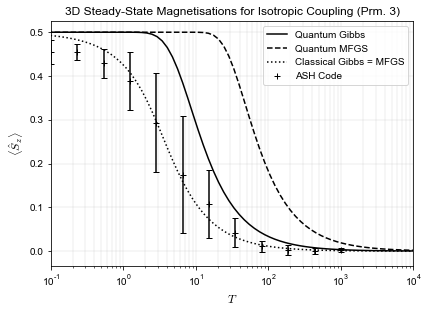

In [148]:
fig_qu, ax_qu = plt.subplots(figsize=(6.5, 4.5))  #size in inches

# labeling
# ax_qu.spines["top"].set_visible(False)
# ax_qu.spines["right"].set_visible(False)
ax_qu.get_xaxis().tick_bottom()
ax_qu.get_yaxis().tick_left()

ax_qu.set_xlabel("$T$", fontsize=12)
ax_qu.set_ylabel("$\langle \\hat{S}_z\\rangle$", fontsize=12)

ax_qu.set_xlim(0.1, 10000)

##### data ######

ax_qu.semilogx(data_qu[:,0], data_qu[:, 1], 'k-', label = "Quantum Gibbs") # Gibbs
# ax_qu.semilogx(data_qu[:,0], data_qu[:, 2], 'k-', label = "1D Quantum MFGS") # 1D MFGS
# ax_qu.semilogx(data_qu[:,0], data_qu[:, 3], 'k--', label = "2D Quantum MFGS") # 2D MFGS
ax_qu.semilogx(data_qu[:,0], data_qu[:, 4], 'k--', label = "Quantum MFGS") # 3D MFGS
ax_qu.semilogx(data_cl_pred[:,0], 0.5*data_cl_pred[:, 1], 'k:', label = "Classical Gibbs = MFGS") # 1D Dynamical Steady State
ax_qu.semilogx(data_cl[:,0], 0.5*data_cl[:, 1], 'k+', label = "ASH Code") # 1D Dynamical Steady State
plt.errorbar(data_cl[:,0], 0.5*data_cl[:, 1], yerr=0.5*data_cl[:, 2], capsize=3.0, ecolor='k', fmt="none")
plt.legend(loc="upper right")
plt.grid(which='both', lw='0.2')
plt.title('3D Steady-State Magnetisations for Isotropic Coupling (Prm. 3)')

plt.savefig("C://Users//crh222//Dropbox//PhD//1. Reaction Coordinate Mapping//Graphs//cl_qu_MFGS.pdf", dpi=300)